In [1]:
#Importing libraries needed for cleaning and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve

In [2]:
#Reading in testing data
df = pd.read_csv('testing_dataset.csv')
df.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,...,durability_publisher_1,durability_publisher_2,strength_overall,strength_publisher_0,strength_publisher_1,strength_publisher_2,overall_publisher_0,overall_publisher_1,overall_publisher_2,y
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,...,0.0,0.0,32300.0,100.0,0.0,0.0,323.0,0.0,0.0,1
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,...,0.0,65.0,11228.0,0.0,0.0,28.0,0.0,0.0,401.0,1
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,...,64.0,0.0,37890.0,0.0,90.0,0.0,0.0,421.0,0.0,1
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,...,0.0,0.0,35440.0,80.0,0.0,0.0,443.0,0.0,0.0,0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,...,0.0,0.0,30807.0,63.0,0.0,0.0,489.0,0.0,0.0,0


In [3]:
X = df.drop('y', 1)
y = df['y']

In [4]:
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,...,durability_publisher_0,durability_publisher_1,durability_publisher_2,strength_overall,strength_publisher_0,strength_publisher_1,strength_publisher_2,overall_publisher_0,overall_publisher_1,overall_publisher_2
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,...,80.0,0.0,0.0,32300.0,100.0,0.0,0.0,323.0,0.0,0.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,...,0.0,0.0,65.0,11228.0,0.0,0.0,28.0,0.0,0.0,401.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,...,0.0,64.0,0.0,37890.0,0.0,90.0,0.0,0.0,421.0,0.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,...,90.0,0.0,0.0,35440.0,80.0,0.0,0.0,443.0,0.0,0.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,...,100.0,0.0,0.0,30807.0,63.0,0.0,0.0,489.0,0.0,0.0


In [5]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: y, dtype: int64

In [6]:
#Splitting up the data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
#Selecting 20 best featuresto began testing models
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [8]:
print(colnames_selected)

['relatives', 'durability', 'strength', 'overall', 'relatives_occupation', 'relatives_base', 'relatives_publisher_2', 'base_publisher_2', 'combat_durability', 'combat_strength', 'intelligence_power', 'intelligence_durability', 'intelligence_strength', 'intelligence_overall', 'power_durability', 'power_strength', 'power_overall', 'durability_strength', 'durability_overall', 'strength_overall']


## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 500)
lr.fit(X_train_selected, y_train)
y_predict = lr.predict(X_test_selected)

In [10]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.6967741935483871


In [11]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

1    111
0     44
Name: y, dtype: int64

In [12]:
# calculate the percentage of 'good'
y_test.mean()

0.7161290322580646

In [13]:
# calculate the percentage of 'evil
1 - y_test.mean()

0.28387096774193543

In [14]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_predict[0:25])

True: [1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1]
Pred: [1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1]


## Naives Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_selected, y_train)
y_predNB = gnb.predict(X_test_selected)

In [16]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_predNB))

Accuracy: 0.6645161290322581


## Stochastic Gradient Descent

In [17]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter= 10000)
sgd.fit(X_train_selected, y_train)
y_predsgd = sgd.predict(X_test_selected)

In [18]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_predsgd))

Accuracy: 0.2709677419354839


## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_selected, y_train)
y_preddt = dt.predict(X_test_selected)

In [20]:
print("Accuracy:", metrics.accuracy_score(y_test, y_preddt))

Accuracy: 0.6838709677419355


## Random Forest 

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_selected, y_train)
y_predrf = rf.predict(X_test_selected)

In [22]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predrf))

Accuracy: 0.7483870967741936


## SVM

In [23]:
from sklearn.svm import SVC
svm = SVC(gamma = 'auto', probability = True)
svm.fit(X_train_selected, y_train)
y_predsvm = svm.predict(X_test_selected)

In [24]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predsvm))

Accuracy: 0.7161290322580646


## K Nearest Neigbhors

In [25]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_selected, y_train)
y_predsneigh = neigh.predict(X_test_selected)

In [26]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predsneigh))

Accuracy: 0.6838709677419355


## AdaBoost

In [27]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.3)
ada.fit(X_train_selected, y_train)
y_predsada = ada.predict(X_test_selected)

In [28]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predsada))

Accuracy: 0.7032258064516129


## Gradient Boost

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.8)
gb.fit(X_train_selected, y_train)
y_predsg_b = gb.predict(X_test_selected)

In [30]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predsg_b))

Accuracy: 0.7032258064516129


## Creating DataFrames for Scores 

In [31]:
scores_dict = { 
               'Logistic Regression': metrics.accuracy_score(y_test, y_predict),
               'Naives Bayes': metrics.accuracy_score(y_test, y_predNB),
               'KNN': metrics.accuracy_score(y_test, y_predsneigh),
               'Decision Trees': metrics.accuracy_score(y_test, y_preddt),
               'Random Forest': metrics.accuracy_score(y_test, y_predrf),
               'SVM': metrics.accuracy_score(y_test, y_predsvm),
               'AdaBoost': metrics.accuracy_score(y_test, y_predsada),
               'Stochastic Gradient Descent': metrics.accuracy_score(y_test, y_predsgd),
               'Gradient Boost': metrics.accuracy_score(y_test, y_predsg_b),
}

In [32]:
scores_dict

{'Logistic Regression': 0.6967741935483871,
 'Naives Bayes': 0.6645161290322581,
 'KNN': 0.6838709677419355,
 'Decision Trees': 0.6838709677419355,
 'Random Forest': 0.7483870967741936,
 'SVM': 0.7161290322580646,
 'AdaBoost': 0.7032258064516129,
 'Stochastic Gradient Descent': 0.2709677419354839,
 'Gradient Boost': 0.7032258064516129}

In [33]:
scores_df = pd.DataFrame(scores_dict, index = ['Accuracy']).T
scores_df

,Accuracy
Logistic Regression,0.696774
Naives Bayes,0.664516
KNN,0.683871
Decision Trees,0.683871
Random Forest,0.748387
SVM,0.716129
AdaBoost,0.703226
Stochastic Gradient Descent,0.270968
Gradient Boost,0.703226


## Confusion Matrices 

In [34]:
print('Logistic Regression Confusion Matrix' '\n', metrics.confusion_matrix(y_test, y_predict))

Logistic Regression Confusion Matrix
 [[  6  38]
 [  9 102]]


In [35]:
print('Naives Bayes Confusion Matrix' '\n', metrics.confusion_matrix(y_test, y_predNB))

Naives Bayes Confusion Matrix
 [[17 27]
 [25 86]]


In [36]:
print('KNN Confusion Matrix' '\n',metrics.confusion_matrix(y_test, y_predsneigh))

KNN Confusion Matrix
 [[15 29]
 [20 91]]


In [37]:
print('Decision Trees Confusion Matrix' '\n',metrics.confusion_matrix(y_test, y_preddt))

Decision Trees Confusion Matrix
 [[19 25]
 [24 87]]


In [38]:
rf_con_matrix = metrics.confusion_matrix(y_test, y_predrf)
print('Random Forest Confusion Matrix' '\n',metrics.confusion_matrix(y_test, y_predrf))

Random Forest Confusion Matrix
 [[ 16  28]
 [ 11 100]]


In [39]:
svm_con_matrix = metrics.confusion_matrix(y_test, y_predsvm)
print('SVM Confusion Matrix' '\n',metrics.confusion_matrix(y_test, y_predsvm))

SVM Confusion Matrix
 [[  1  43]
 [  1 110]]


In [40]:
print('AdaBoost Confusion Matrix' '\n',metrics.confusion_matrix(y_test, y_predsada))

AdaBoost Confusion Matrix
 [[  5  39]
 [  7 104]]


In [41]:
print('Stochastic Gradient Descent Confusion Matrix' '\n',metrics.confusion_matrix(y_test, y_predsgd))

Stochastic Gradient Descent Confusion Matrix
 [[ 41   3]
 [110   1]]


In [42]:
gb_con_matrix = metrics.confusion_matrix(y_test, y_predsg_b)
print('Gradient Boost Confusion Matrix' '\n',metrics.confusion_matrix(y_test, y_predsg_b))

Gradient Boost Confusion Matrix
 [[20 24]
 [22 89]]


### Exploring Random Forest

In [43]:
print('Random Forest Confusion Matrix' '\n',metrics.confusion_matrix(y_test, y_predrf))

Random Forest Confusion Matrix
 [[ 16  28]
 [ 11 100]]


In [44]:
rf_confusion = metrics.confusion_matrix(y_test, y_predrf)
TP = rf_confusion[1, 1]
TN = rf_confusion[0, 0]
FP = rf_confusion[0, 1]
FN = rf_confusion[1, 0]

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predrf)
classes = ['Villain', 'Hero']

In [46]:
#Function to plot confusion matrices
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[ 16  28]
 [ 11 100]]


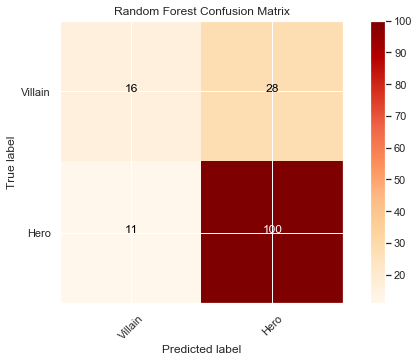

In [77]:
import itertools
plt.subplots(figsize = (8,5))
plot_confusion_matrix(rf_con_matrix, classes,
                          normalize=False,
                          title='Random Forest Confusion Matrix',
                          cmap= 'OrRd')
plt.savefig('/Users/eddiecpognon/Desktop/Data_Science/Mod5project/Character_Classification/images/rfconmatrix.png')

## Support Vector Machine

Confusion Matrix, without normalization
[[  1  43]
 [  1 110]]


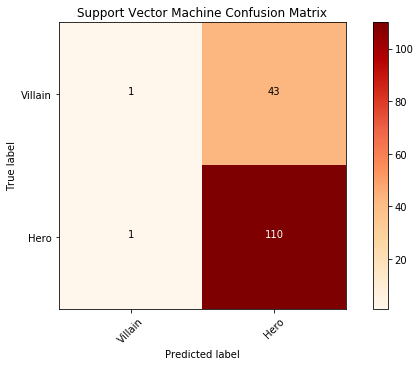

In [48]:
plt.subplots(figsize = (8,5))
plot_confusion_matrix(svm_con_matrix, classes,
                          normalize=False,
                          title='Support Vector Machine Confusion Matrix',
                          cmap= 'OrRd')

## Gradient Boost

Confusion Matrix, without normalization
[[20 24]
 [22 89]]


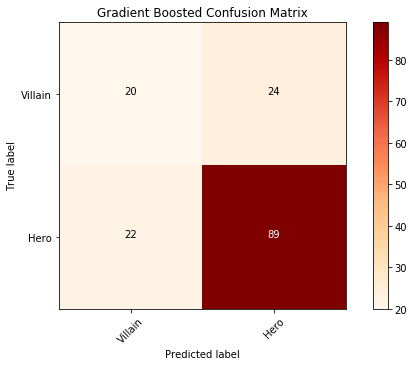

In [49]:
plt.subplots(figsize = (8,5))
plot_confusion_matrix(gb_con_matrix, classes,
                          normalize=False,
                          title='Gradient Boosted Confusion Matrix',
                          cmap= 'OrRd')

In [50]:
l = { 'Random Forest Calculation Accuarcy': metrics.accuracy_score(y_test, y_predrf) }
m = { 'SVM Calculation Accuracy': metrics.accuracy_score(y_test, y_predsvm) }
n = { 'Gradient Boost Calculation Accuarcy':metrics.accuracy_score(y_test, y_predsg_b) }

In [51]:
l,m,n

({'Random Forest Calculation Accuarcy': 0.7483870967741936},
 {'SVM Calculation Accuracy': 0.7161290322580646},
 {'Gradient Boost Calculation Accuarcy': 0.7032258064516129})

## Random Forest Evaluation Metrics

In [52]:
print('Random Forest Classication Accuracy')
print(metrics.accuracy_score(y_test, y_predrf))

Random Forest Classication Accuracy
0.7483870967741936


In [53]:
print('Classication Error')
print(1 - metrics.accuracy_score(y_test, y_predrf))

Classication Error
0.25161290322580643


In [54]:
print('Recall')
print(metrics.recall_score(y_test, y_predrf))

Recall
0.9009009009009009


In [55]:
print('Specificity')
print(TN / float(TN + FP))

Specificity
0.36363636363636365


In [56]:
print('False Positive')
print(FP / float(TN + FP))

False Positive
0.6363636363636364


In [57]:
print('Precision')
print(metrics.precision_score(y_test, y_predsada))

Precision
0.7272727272727273


In [58]:
print('F1 Score')
print(2*(metrics.precision_score(y_test, y_predsada)*metrics.recall_score(y_test, y_predsada))/(metrics.precision_score(y_test, y_predsada)+metrics.recall_score(y_test, y_predsada)))

F1 Score
0.8188976377952756


In [59]:
class_metrics_dict  =  { 
               'Classification Accuracy': metrics.accuracy_score(y_test, y_predrf),
               'Classification Error': (1 - metrics.accuracy_score(y_test, y_predrf)),
               'Recall': (metrics.recall_score(y_test, y_predrf)),
               'Specificity': (TN / float(TN + FP)),
               'False Positive': (FP / float(TN + FP)),
               'Precision': (metrics.precision_score(y_test, y_predrf)),
               'F1 Score': (2*(metrics.precision_score(y_test, y_predrf)
                             *metrics.recall_score(y_test, y_predrf))
                             /(metrics.precision_score(y_test, y_predrf)
                             +metrics.recall_score(y_test, y_predrf))), 
               }    
class_metrics_dict

{'Classification Accuracy': 0.7483870967741936,
 'Classification Error': 0.25161290322580643,
 'Recall': 0.9009009009009009,
 'Specificity': 0.36363636363636365,
 'False Positive': 0.6363636363636364,
 'Precision': 0.78125,
 'F1 Score': 0.8368200836820082}

## Adjusting the Classification Threshold

In [60]:
rf.predict(X_test_selected)[0:50]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1])

In [61]:
# print the first 10 predicted probabilities of class membership
rf.predict_proba(X_test_selected)[0:10, :]

array([[0.175     , 0.825     ],
       [0.4       , 0.6       ],
       [0.275     , 0.725     ],
       [0.35      , 0.65      ],
       [0.19424284, 0.80575716],
       [0.15      , 0.85      ],
       [0.525     , 0.475     ],
       [0.325     , 0.675     ],
       [0.3       , 0.7       ],
       [0.06475524, 0.93524476]])

In [62]:
rf.predict_proba(X_test_selected)[0:10, 1]

array([0.825     , 0.6       , 0.725     , 0.65      , 0.80575716,
       0.85      , 0.475     , 0.675     , 0.7       , 0.93524476])

In [63]:
# store the predicted probabilities for class 1
y_pred_prob = rf.predict_proba(X_test_selected)[:, 1]

Text(0, 0.5, 'Frequency')

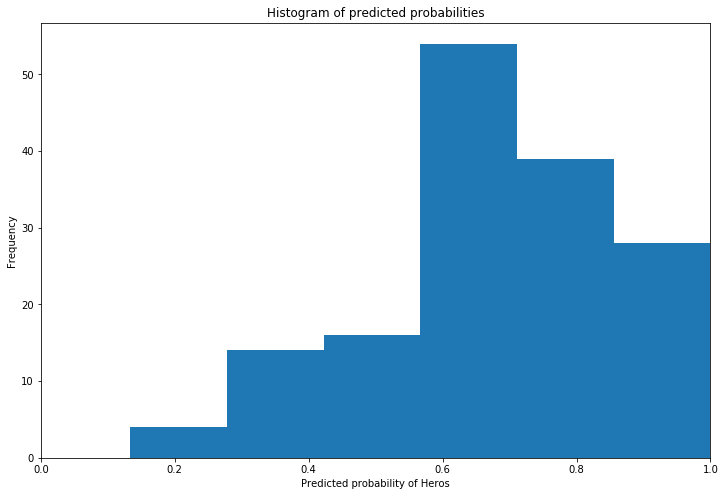

In [64]:
# histogram of predicted probabilities
plt.subplots(figsize = (12,8))
plt.hist(y_pred_prob, bins=6)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Heros')
plt.ylabel('Frequency')

In [65]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.4)[0]

In [66]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.825     , 0.6       , 0.725     , 0.65      , 0.80575716,
       0.85      , 0.475     , 0.675     , 0.7       , 0.93524476])

In [67]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:80]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.])

In [68]:
# previous confusion matrix (default threshold of 0.5)
print(rf_confusion)

[[ 16  28]
 [ 11 100]]


In [69]:
# new confusion matrix (threshold of 0.5)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 12  32]
 [  5 106]]


In [70]:
# sensitivity has increased (used to be 0.98)
print(56 / float(56))

1.0


In [71]:
# specificity has decreased (used to be 0.09)
print(0 / float(0 + 22))

0.0


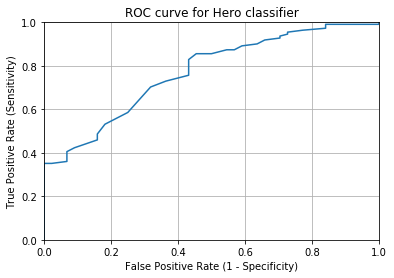

In [72]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Hero classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## ROC Curves for Top 3 Accuaracy Scores

In [73]:
# Calculate the probability scores for each of the datapoints from the top 3 scores:
rf_y_score = rf.predict_proba(X_test_selected)[:, 1]
svm_y_score = svm.predict_proba(X_test_selected)[:, 1]
gb_y_score = gb.predict_proba(X_test_selected)[:, 1]

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_score)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_y_score)
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb_y_score)

rf_scores = pd.concat([pd.DataFrame(rf_fpr), pd.DataFrame(rf_tpr)], axis = 1)
rf_scores['Model'] = 'Random Forest'
rf_scores.columns = ['False Positive Rate (1 - Specificity)', 
                        'True Positive Rate (Sensitivity)', 'Model']

svm_scores = pd.concat([pd.DataFrame(svm_fpr), pd.DataFrame(svm_tpr)], axis = 1)
svm_scores['Model'] = 'Support Vector Machine'
svm_scores.columns = ['False Positive Rate (1 - Specificity)', 
                         'True Positive Rate (Sensitivity)', 'Model']

gb_scores = pd.concat([pd.DataFrame(gb_fpr), pd.DataFrame(gb_tpr)], axis = 1)
gb_scores['Model'] = 'Gradient Boost'
gb_scores.columns = ['False Positive Rate (1 - Specificity)', 
                             'True Positive Rate (Sensitivity)', 'Model']


scores = pd.concat([rf_scores, svm_scores, gb_scores])

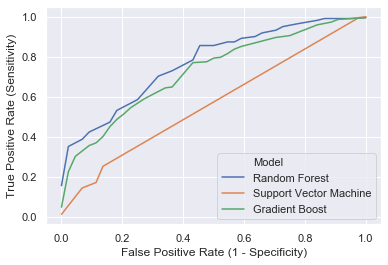

In [78]:
sns.set(style="darkgrid")
sns.lineplot(x="False Positive Rate (1 - Specificity)", y="True Positive Rate (Sensitivity)", 
             hue="Model", ci = None, data = scores);
plt.savefig('/Users/eddiecpognon/Desktop/Data_Science/Mod5project/Character_Classification/images/roc.png')

## Plotting Feature Importances

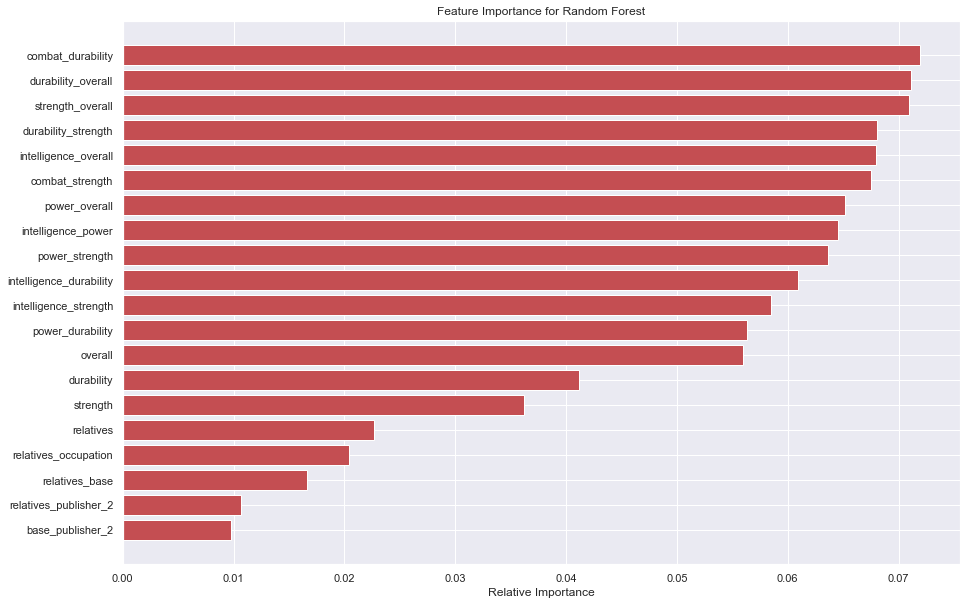

In [83]:
sns.set(style="darkgrid")
features = X_test_selected.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

fig = plt.figure(figsize=(15, 10))
plt.title('Feature Importance for Random Forest')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
fig.savefig('/Users/eddiecpognon/Desktop/Data_Science/Mod5project/Character_Classification/images/featimp.png')

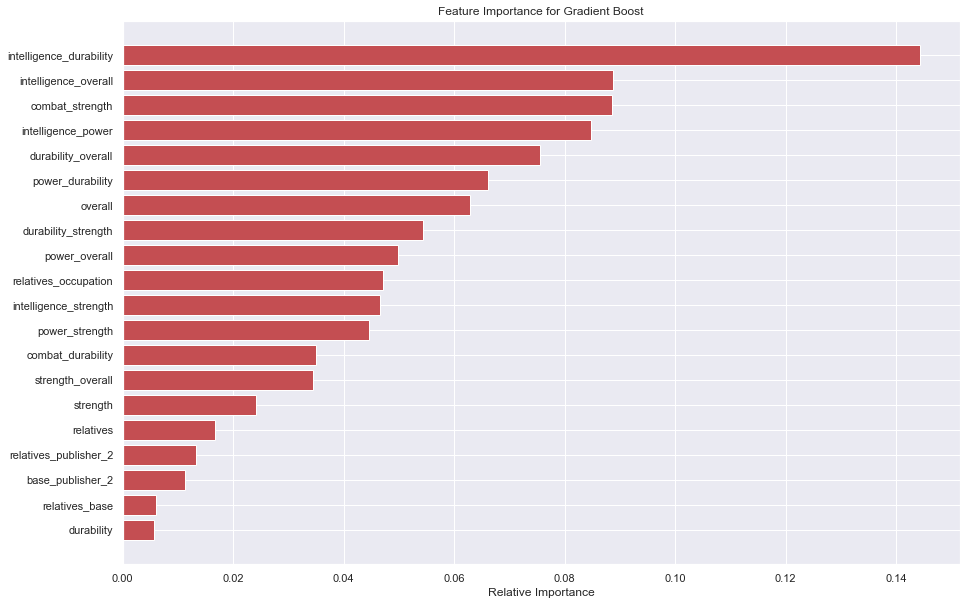

In [76]:
sns.set(style="darkgrid")
features = X_test_selected.columns
importances = gb.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(15, 10))
plt.title('Feature Importance for Gradient Boost')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()